In [18]:
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import matplotlib.ticker as ticker 
from sklearn.cluster import KMeans
from datetime import datetime
from pytz import timezone

In [19]:
file = open('/app/knight/truth.txt','r')

In [20]:
content = file.readlines()
truth = [content[x].rstrip() for x in range(len(content))]
truthJedi = [truth[x] for x in range(len(content)) if truth[x] == 'Jedi']
truthSith = [truth[x] for x in range(len(content)) if truth[x] == 'Sith']

file.close()

In [21]:
print(len(truth))
print(truth)
print(len(truthSith))
print(len(truthJedi))

100
['Jedi', 'Jedi', 'Sith', 'Sith', 'Jedi', 'Sith', 'Jedi', 'Sith', 'Sith', 'Sith', 'Sith', 'Sith', 'Jedi', 'Jedi', 'Sith', 'Jedi', 'Jedi', 'Sith', 'Jedi', 'Jedi', 'Jedi', 'Sith', 'Sith', 'Jedi', 'Sith', 'Sith', 'Sith', 'Sith', 'Jedi', 'Jedi', 'Jedi', 'Sith', 'Sith', 'Sith', 'Sith', 'Jedi', 'Jedi', 'Jedi', 'Sith', 'Jedi', 'Sith', 'Jedi', 'Jedi', 'Sith', 'Jedi', 'Jedi', 'Jedi', 'Sith', 'Jedi', 'Jedi', 'Sith', 'Jedi', 'Sith', 'Jedi', 'Jedi', 'Sith', 'Sith', 'Jedi', 'Jedi', 'Jedi', 'Sith', 'Jedi', 'Sith', 'Jedi', 'Jedi', 'Jedi', 'Sith', 'Jedi', 'Sith', 'Jedi', 'Sith', 'Sith', 'Jedi', 'Sith', 'Sith', 'Sith', 'Jedi', 'Sith', 'Jedi', 'Jedi', 'Sith', 'Jedi', 'Sith', 'Sith', 'Sith', 'Jedi', 'Jedi', 'Jedi', 'Jedi', 'Sith', 'Jedi', 'Sith', 'Sith', 'Sith', 'Sith', 'Sith', 'Sith', 'Sith', 'Jedi', 'Sith']
51
49


In [22]:
file = open('/app/knight/predictions.txt','r')

In [23]:
content = file.readlines()
print(content)
pred = [content[x].rstrip() for x in range(len(content))]
predJedi = [pred[x] for x in range(len(content)) if pred[x] == 'Jedi']
predSith = [pred[x] for x in range(len(content)) if pred[x] == 'Sith']

file.close()

['Sith\n', 'Sith\n', 'Jedi\n', 'Sith\n', 'Jedi\n', 'Jedi\n', 'Sith\n', 'Sith\n', 'Sith\n', 'Jedi\n', 'Jedi\n', 'Jedi\n', 'Jedi\n', 'Sith\n', 'Jedi\n', 'Jedi\n', 'Jedi\n', 'Sith\n', 'Sith\n', 'Sith\n', 'Jedi\n', 'Jedi\n', 'Sith\n', 'Jedi\n', 'Jedi\n', 'Jedi\n', 'Sith\n', 'Jedi\n', 'Jedi\n', 'Sith\n', 'Jedi\n', 'Sith\n', 'Jedi\n', 'Sith\n', 'Jedi\n', 'Jedi\n', 'Jedi\n', 'Sith\n', 'Jedi\n', 'Sith\n', 'Sith\n', 'Jedi\n', 'Sith\n', 'Sith\n', 'Jedi\n', 'Sith\n', 'Jedi\n', 'Jedi\n', 'Sith\n', 'Sith\n', 'Jedi\n', 'Sith\n', 'Jedi\n', 'Jedi\n', 'Sith\n', 'Jedi\n', 'Jedi\n', 'Jedi\n', 'Jedi\n', 'Sith\n', 'Jedi\n', 'Sith\n', 'Sith\n', 'Jedi\n', 'Jedi\n', 'Sith\n', 'Jedi\n', 'Sith\n', 'Sith\n', 'Jedi\n', 'Jedi\n', 'Sith\n', 'Jedi\n', 'Jedi\n', 'Jedi\n', 'Sith\n', 'Sith\n', 'Sith\n', 'Jedi\n', 'Sith\n', 'Jedi\n', 'Jedi\n', 'Sith\n', 'Jedi\n', 'Sith\n', 'Sith\n', 'Jedi\n', 'Jedi\n', 'Sith\n', 'Sith\n', 'Jedi\n', 'Sith\n', 'Jedi\n', 'Jedi\n', 'Sith\n', 'Sith\n', 'Jedi\n', 'Jedi\n', 'Sith\n', 'Jedi']


In [24]:
print(len(pred))
print(pred)
print(len(predJedi))
print(len(predSith))

100
['Sith', 'Sith', 'Jedi', 'Sith', 'Jedi', 'Jedi', 'Sith', 'Sith', 'Sith', 'Jedi', 'Jedi', 'Jedi', 'Jedi', 'Sith', 'Jedi', 'Jedi', 'Jedi', 'Sith', 'Sith', 'Sith', 'Jedi', 'Jedi', 'Sith', 'Jedi', 'Jedi', 'Jedi', 'Sith', 'Jedi', 'Jedi', 'Sith', 'Jedi', 'Sith', 'Jedi', 'Sith', 'Jedi', 'Jedi', 'Jedi', 'Sith', 'Jedi', 'Sith', 'Sith', 'Jedi', 'Sith', 'Sith', 'Jedi', 'Sith', 'Jedi', 'Jedi', 'Sith', 'Sith', 'Jedi', 'Sith', 'Jedi', 'Jedi', 'Sith', 'Jedi', 'Jedi', 'Jedi', 'Jedi', 'Sith', 'Jedi', 'Sith', 'Sith', 'Jedi', 'Jedi', 'Sith', 'Jedi', 'Sith', 'Sith', 'Jedi', 'Jedi', 'Sith', 'Jedi', 'Jedi', 'Jedi', 'Sith', 'Sith', 'Sith', 'Jedi', 'Sith', 'Jedi', 'Jedi', 'Sith', 'Jedi', 'Sith', 'Sith', 'Jedi', 'Jedi', 'Sith', 'Sith', 'Jedi', 'Sith', 'Jedi', 'Jedi', 'Sith', 'Sith', 'Jedi', 'Jedi', 'Sith', 'Jedi']
55
45


In [25]:
compileData = pd.DataFrame({'Truth': truth,'Prediction': pred})

In [26]:
jediNegatif = 0
sithNegatif = 0

for i in range(len(compileData['Prediction'])):
    if (compileData['Prediction'][i] != compileData['Truth'][i]):
        if (compileData['Prediction'][i] == 'Jedi'):
            jediNegatif += 1
        else:
            sithNegatif += 1

print(jediNegatif)
print(sithNegatif)

confusionMatrix = [[len(predJedi) - jediNegatif, sithNegatif], [jediNegatif, len(predSith) - sithNegatif]]

print(confusionMatrix)

30
24
[[25, 24], [30, 21]]


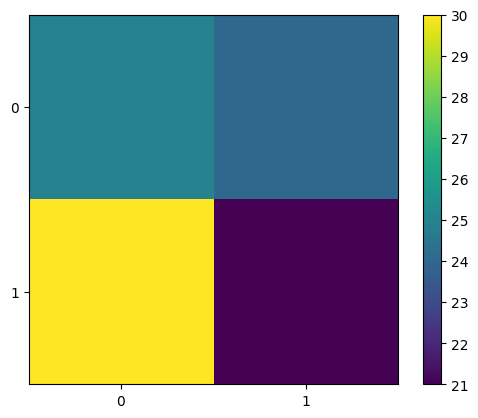

In [27]:
map = plt.imshow( confusionMatrix )

plt.xticks(range(2))
plt.yticks(range(2))
plt.title( "2-D Heat Map" )
plt.colorbar(map)
plt.title('')
plt.show() 

In [28]:
precisionPos = confusionMatrix[0][0] / len(predJedi)

precisionNeg = confusionMatrix[1][1] / len(predSith)

print(precisionPos)
print(precisionNeg)

0.45454545454545453
0.4666666666666667


In [29]:
recallPos = confusionMatrix[0][0] / len(truthJedi)
recallNeg = confusionMatrix[1][1] / len(truthSith)

print(recallPos)
print(recallNeg)

0.5102040816326531
0.4117647058823529


In [30]:
fscorePos = (2 * precisionPos * recallPos) / (precisionPos + recallPos)
fscoreNeg = (2 * precisionNeg * recallNeg) / (precisionNeg + recallNeg)

print(fscorePos)
print(fscoreNeg)

0.4807692307692308
0.43749999999999994


In [31]:
totalPos = len(truthJedi)
totalNeg = len(truthSith)

print(totalPos)
print(totalNeg)

49
51


In [32]:
accuracy = (confusionMatrix[0][0] + confusionMatrix[1][1]) / (len(truthJedi) + len(truthSith))

print(accuracy)

0.46


In [33]:
resultTable = pd.DataFrame([[round(precisionPos, 2), round(recallPos, 2), round(fscorePos, 2)], [round(precisionNeg, 2), round(recallNeg, 2), round(fscoreNeg, 2)]], columns=['Precision', 'Recall', 'f1-score'], index=['Jedi', 'Sith'])

print(resultTable)
print(f'Global Accuracy: {accuracy}')

      Precision  Recall  f1-score
Jedi       0.45    0.51      0.48
Sith       0.47    0.41      0.44
Global Accuracy: 0.46
